<a href="https://colab.research.google.com/github/bhavya31-bit/Shoplifting-detection-using-Yolov8/blob/main/Shoplifting_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ultralytics roboflow opencv-python matplotlib seaborn scikit-learn pyyaml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 97.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 143.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


In [ ]:

!pip install roboflow ultralytics opencv-python
from roboflow import Roboflow

rf = Roboflow(api_key="o74bnLtlhEjV5LDEULHY")
project = rf.workspace().project("cctv-footage-annotation-b11-a8noa")
dataset = project.version(2).download("yolov8")

data_yaml_path = dataset.location + "/data.yaml"


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8s.pt")

model.train(
    data=data_yaml_path,
    epochs=50,
    imgsz=640,
    batch=16,
    lr0=0.001,
    patience=10,
    augment=True,
    device=0,
    plots=True
)


Ultralytics 8.3.221 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/CCTV-Footage-Annotation-b11-2/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, perspective=0.0, pl

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ab9917d13d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [ ]:
print("Evaluating model performance...")

metrics = model.val()

print("\n" + "="*50)
print("MODEL PERFORMANCE METRICS")
print("="*50)
print(f"mAP50 (IoU=0.5): {metrics.box.map50:.4f}")
print(f"mAP50-95 (IoU=0.5:0.95): {metrics.box.map:.4f}")
print(f"Precision: {metrics.box.mp:.4f}")
print(f"Recall: {metrics.box.mr:.4f}")
print(f"F1-Score: {2 * (metrics.box.mp * metrics.box.mr) / (metrics.box.mp + metrics.box.mr):.4f}")
print("="*50)

model_metrics = {
    'mAP50': metrics.box.map50,
    'mAP50_95': metrics.box.map,
    'precision': metrics.box.mp,
    'recall': metrics.box.mr
}

Evaluating model performance...
Ultralytics 8.3.221 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1463.5±1193.6 MB/s, size: 257.6 KB)
val: Scanning /content/CCTV-Footage-Annotation-b11-2/valid/labels.cache... 1507 images, 17 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1507/1507 1.6Mit/s 0.0s
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 99, len(boxes) = 2259. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 95/95 4.1it/s 23.4s
                   all       1507       2259       0.78      0.739      0.795      0.593
               Product         63         66       0.57      0.348     

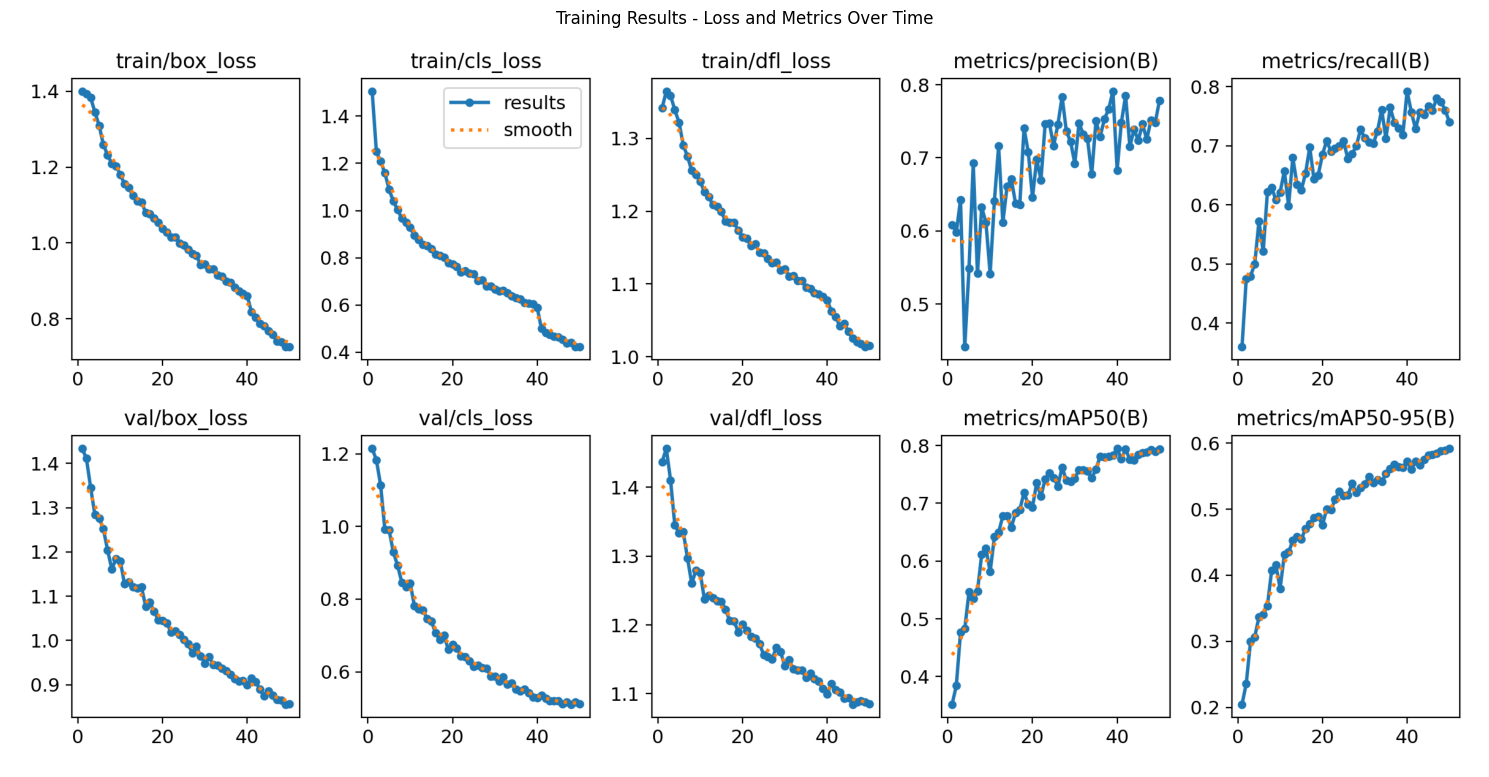

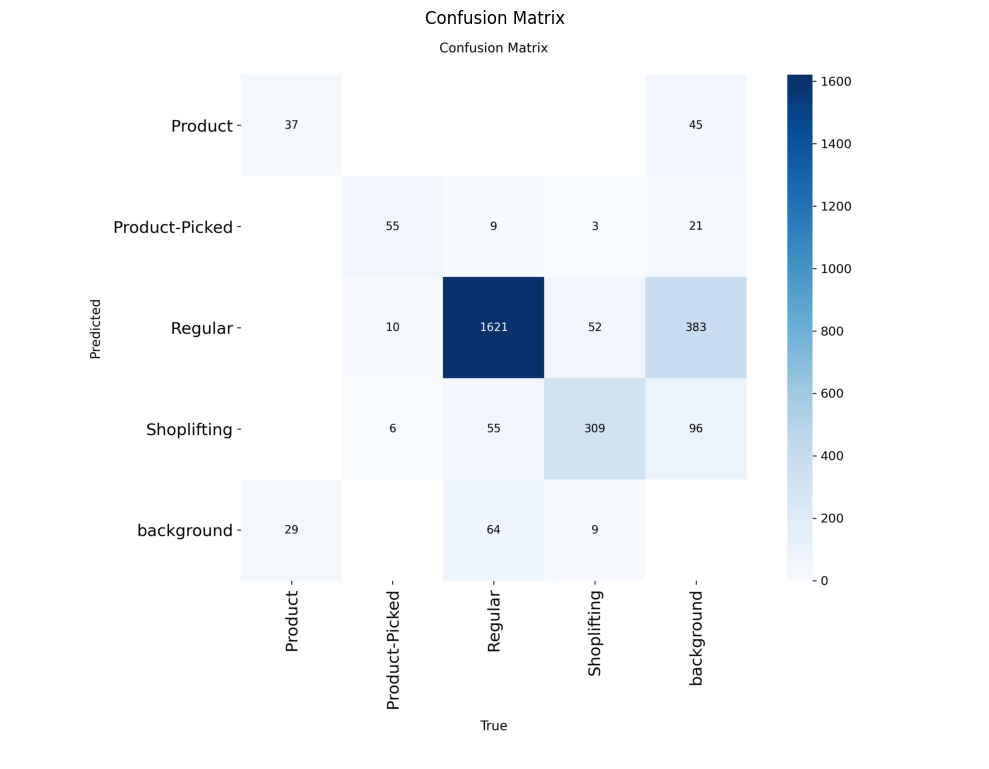

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

def plot_training_results(results_dir="runs/detect/train"):
    """Plot training results"""
    results_path = os.path.join(results_dir, "results.png")

    if os.path.exists(results_path):
        img = cv2.imread(results_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(15, 10))
        plt.imshow(img_rgb)
        plt.axis('off')
        plt.title('Training Results - Loss and Metrics Over Time')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Results plot not found at {results_path}")

    confusion_path = os.path.join(results_dir, "confusion_matrix.png")
    if os.path.exists(confusion_path):
        img = cv2.imread(confusion_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(10, 8))
        plt.imshow(img_rgb)
        plt.axis('off')
        plt.title('Confusion Matrix')
        plt.tight_layout()
        plt.show()

plot_training_results()

Found 6 of the specified test images in the directory.
Predicting on: Shoplifting-42-_mp4-6_jpg.rf.924d1991ecda8a937db1b633513cc068.jpg

image 1/1 /content/CCTV-Footage-Annotation-b11-2/valid/images/Shoplifting-42-_mp4-6_jpg.rf.924d1991ecda8a937db1b633513cc068.jpg: 480x640 1 Shoplifting, 13.5ms
Speed: 1.6ms preprocess, 13.5ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)
Found 1 detections:
  1. Shoplifting: 0.840


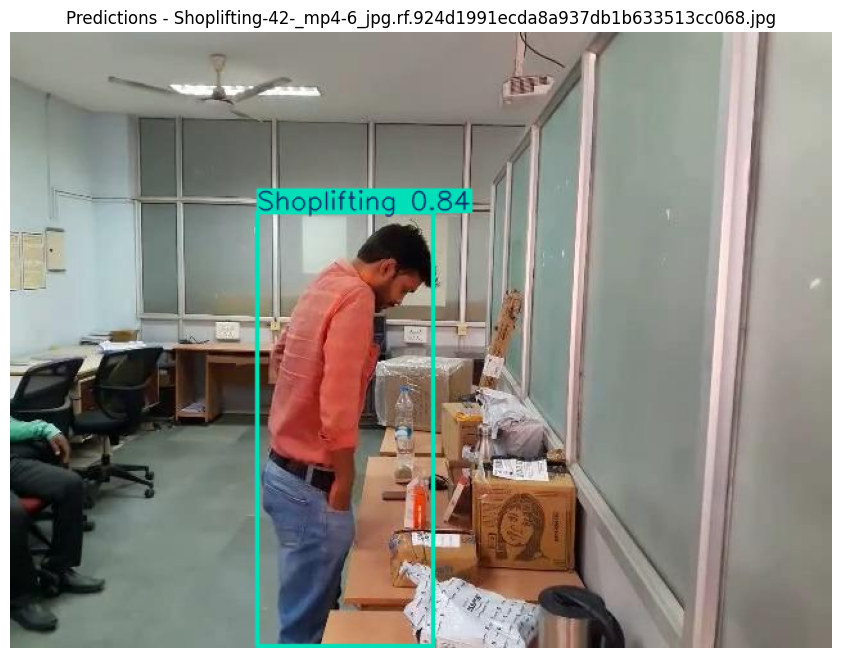

--------------------------------------------------
Predicting on: frame_987_jpg.rf.efbf6d6c9bceaa5cfbca263101b6d07e.jpg

image 1/1 /content/CCTV-Footage-Annotation-b11-2/valid/images/frame_987_jpg.rf.efbf6d6c9bceaa5cfbca263101b6d07e.jpg: 384x640 1 Regular, 1 Shoplifting, 11.6ms
Speed: 3.3ms preprocess, 11.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)
Found 2 detections:
  1. Regular: 0.930
  2. Shoplifting: 0.894


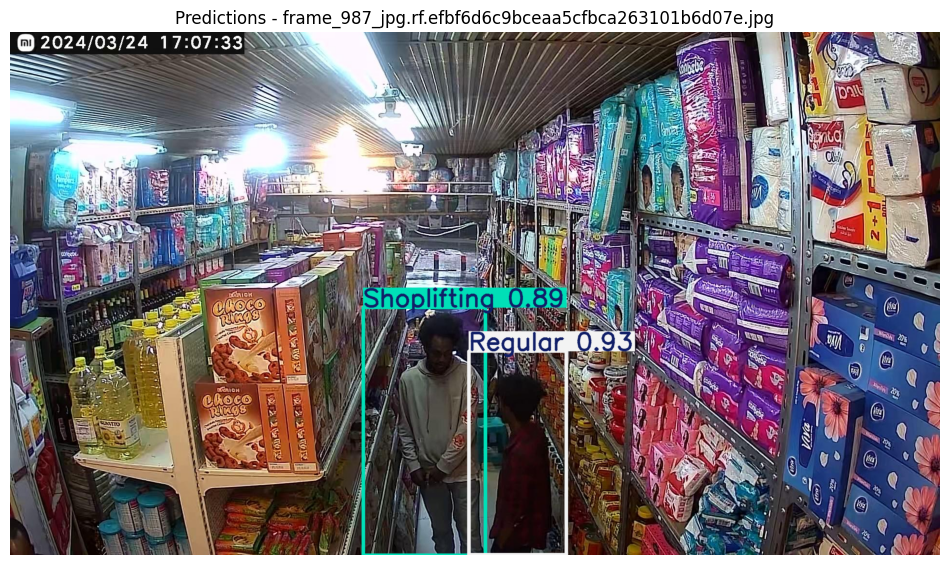

--------------------------------------------------
Predicting on: video1_2973_jpg.rf.873281aa0095de5842063af7b91f2d08.jpg

image 1/1 /content/CCTV-Footage-Annotation-b11-2/valid/images/video1_2973_jpg.rf.873281aa0095de5842063af7b91f2d08.jpg: 384x640 1 Product, 1 Product-Picked, 1 Regular, 11.8ms
Speed: 3.5ms preprocess, 11.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
Found 3 detections:
  1. Product-Picked: 0.785
  2. Regular: 0.507
  3. Product: 0.492


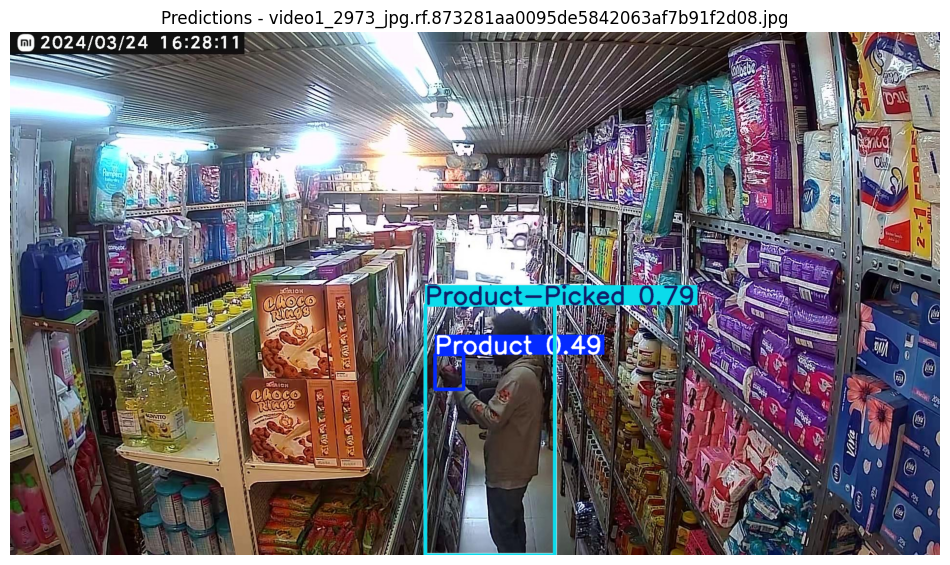

--------------------------------------------------
Predicting on: output_mp4-1605_jpg.rf.d0a35f353e4416b0c2cf041c2fc8b175.jpg

image 1/1 /content/CCTV-Footage-Annotation-b11-2/valid/images/output_mp4-1605_jpg.rf.d0a35f353e4416b0c2cf041c2fc8b175.jpg: 384x640 3 Regulars, 13.3ms
Speed: 5.4ms preprocess, 13.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)
Found 3 detections:
  1. Regular: 0.809
  2. Regular: 0.371
  3. Regular: 0.308


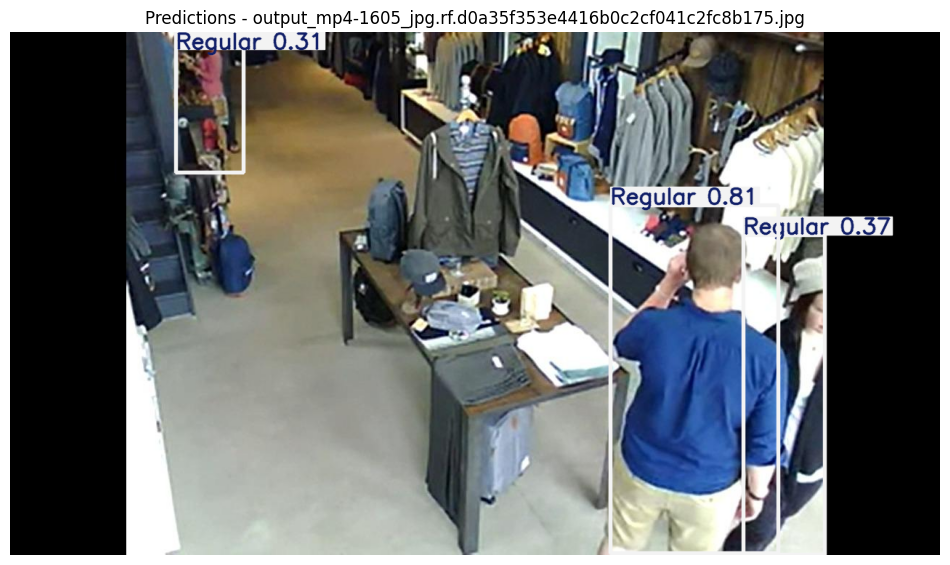

--------------------------------------------------
Predicting on: video1_585_jpg.rf.01f77c0fea76235b7b12aaa763440da2.jpg

image 1/1 /content/CCTV-Footage-Annotation-b11-2/valid/images/video1_585_jpg.rf.01f77c0fea76235b7b12aaa763440da2.jpg: 384x640 1 Product, 1 Product-Picked, 10.6ms
Speed: 3.3ms preprocess, 10.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
Found 2 detections:
  1. Product-Picked: 0.916
  2. Product: 0.666


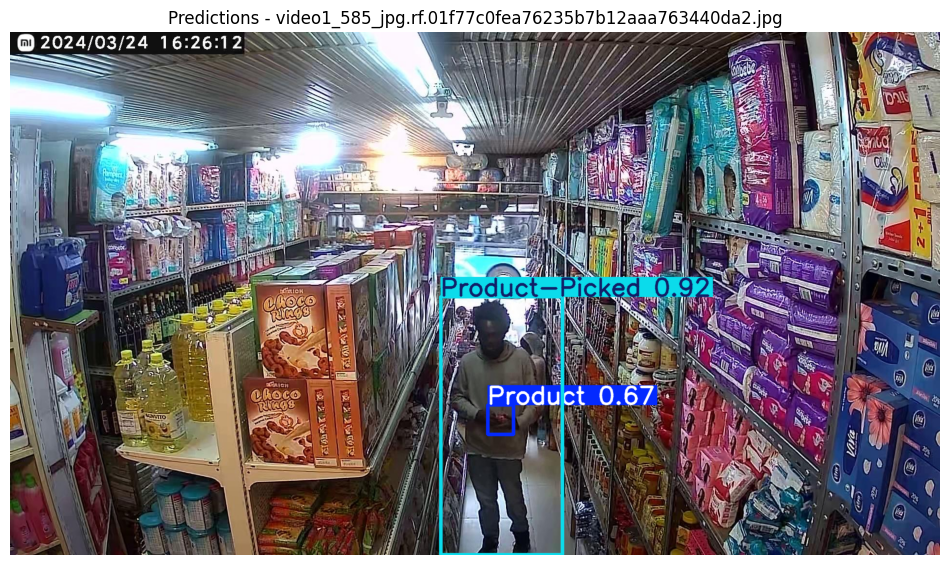

--------------------------------------------------
Predicting on: output27_mp4-48_jpg.rf.6890a0b2309b07a5d1626a7cb511529c.jpg

image 1/1 /content/CCTV-Footage-Annotation-b11-2/valid/images/output27_mp4-48_jpg.rf.6890a0b2309b07a5d1626a7cb511529c.jpg: 384x640 1 Regular, 10.6ms
Speed: 2.1ms preprocess, 10.6ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)
Found 1 detections:
  1. Regular: 0.739


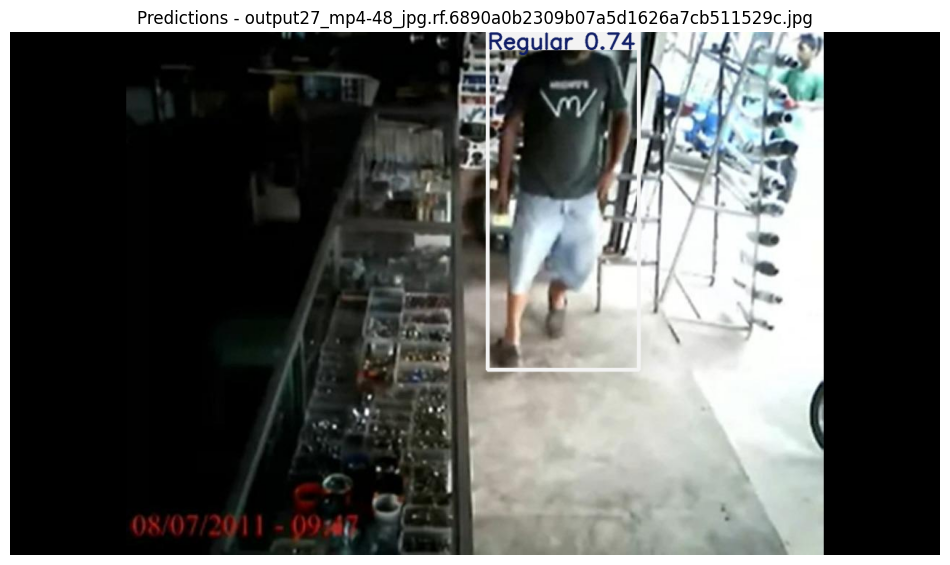

--------------------------------------------------


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

def predict_and_show(model, image_path, conf_threshold=0.25):
    """Predict on image and display results"""
    print(f"Predicting on: {os.path.basename(image_path)}")

    results = model(image_path, conf=conf_threshold)

    for r in results:
        boxes = r.boxes
        if boxes is not None and len(boxes) > 0:
            print(f"Found {len(boxes)} detections:")
            for i, box in enumerate(boxes):
                conf = box.conf[0].item()
                cls = int(box.cls[0].item())
                class_name = model.names[cls]
                print(f"  {i+1}. {class_name}: {conf:.3f}")
        else:
            print("No detections found")

        img_with_detections = r.plot()
        img_rgb = cv2.cvtColor(img_with_detections, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(12, 8))
        plt.imshow(img_rgb)
        plt.axis('off')
        plt.title(f'Predictions - {os.path.basename(image_path)}')
        plt.show()

    return results

dataset_path = dataset.location
test_img_dir = os.path.join(dataset_path, 'valid', 'images')

specific_test_images = [
    "Shoplifting-42-_mp4-6_jpg.rf.924d1991ecda8a937db1b633513cc068.jpg",
    "frame_987_jpg.rf.efbf6d6c9bceaa5cfbca263101b6d07e.jpg",
    "video1_2973_jpg.rf.873281aa0095de5842063af7b91f2d08.jpg",
    "output_mp4-1605_jpg.rf.d0a35f353e4416b0c2cf041c2fc8b175.jpg",
    "video1_585_jpg.rf.01f77c0fea76235b7b12aaa763440da2.jpg",
    "output27_mp4-48_jpg.rf.6890a0b2309b07a5d1626a7cb511529c.jpg"
]

if os.path.exists(test_img_dir):
    all_test_images_in_dir = os.listdir(test_img_dir)
    found_images = [img_name for img_name in specific_test_images if img_name in all_test_images_in_dir]

    if found_images:
        print(f"Found {len(found_images)} of the specified test images in the directory.")

        for img_name in found_images:
            img_path = os.path.join(test_img_dir, img_name)
            results = predict_and_show(model, img_path, conf_threshold=0.25)
            print("-" * 50)
    else:
        print("None of the specified test images were found in the directory.")
else:
    print("Test directory not found")

In [ ]:
print("Saving trained model...")

best_model_path = "runs/detect/train/weights/best.pt"
last_model_path = "runs/detect/train/weights/last.pt"

print(f"Best model saved at: {best_model_path}")
print(f"Last model saved at: {last_model_path}")

try:
    print("Exporting model to ONNX format...")
    onnx_path = model.export(format='onnx')
    print(f"ONNX model saved at: {onnx_path}")
except Exception as e:
    print(f"ONNX export failed: {e}")

try:
    print("Exporting model to TensorRT format...")
    trt_path = model.export(format='engine')
    print(f"TensorRT model saved at: {trt_path}")
except Exception as e:
    print(f"TensorRT export failed: {e}")

print("\nModel Summary:")
MODEL_SIZE = "yolov8s"
print(f"Model: {MODEL_SIZE}")
print(f"Classes: {list(model.names.values())}")
print(f"Number of classes: {len(model.names)}")
print(f"Final mAP50: {model_metrics['mAP50']:.4f}")
print(f"Final Precision: {model_metrics['precision']:.4f}")
print(f"Final Recall: {model_metrics['recall']:.4f}")

print("\nTraining completed successfully!")

Saving trained model...
Best model saved at: runs/detect/train/weights/best.pt
Last model saved at: runs/detect/train/weights/last.pt
Exporting model to ONNX format...
Ultralytics 8.3.221 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.00GHz)

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 8, 8400) (21.5 MB)

ONNX: starting export with onnx 1.19.1 opset 22...
ONNX: slimming with onnxslim 0.1.72...
ONNX: export success ✅ 1.6s, saved as '/content/runs/detect/train/weights/best.onnx' (42.7 MB)

Export complete (2.6s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=/content/runs/detect/train/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=/content/runs/detect/train/weights/best.onnx imgsz=640 data=/content/CCTV-Footage-Annotation-b11-2/data.yaml  
Visualize:       https://netron.app
ONNX model saved at: /content/runs/de

Saving test_shp2.jpg to test_shp2 (1).jpg
Uploaded file: /content/test_shp2 (1).jpg
Predicting on: test_shp2 (1).jpg

image 1/1 /content/test_shp2 (1).jpg: 640x416 1 Shoplifting, 71.0ms
Speed: 3.8ms preprocess, 71.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 416)
Found 1 detections:
  1. Shoplifting: 0.699


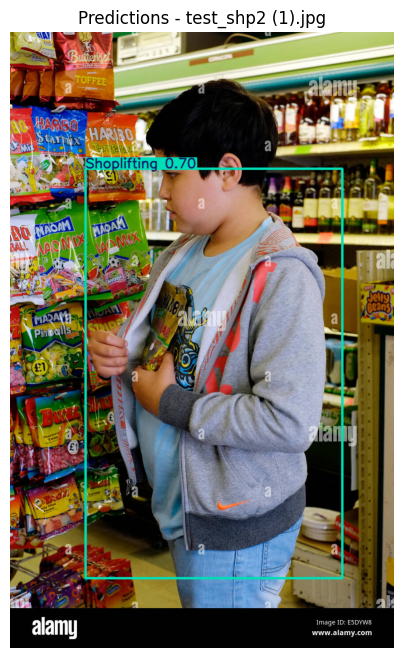

In [ ]:
from google.colab import files
import os

uploaded = files.upload()

for filename in uploaded.keys():
    image_path = f"/content/{filename}"
    print(f"Uploaded file: {image_path}")

try:
    predict_and_show(model, image_path, conf_threshold=0.3)
except NameError:
    print("Please ensure the 'model' and 'predict_and_show' are defined by running the previous cells.")